# Raster analysis  - advanced concepts

Raster functions are lightweight and process only the pixels visible on your screen, in memory, without creating intermediate files. They are powerful because you can chain them together and apply them on huge rasters and mosaics on the fly. This guide will introduce you to the different capabilities of Imagery Layers and how to apply raster functions. As a sample, it uses Landsat imagery data.

<blockquote><b>Note:</b> This guide requires bokeh python plotting library. Install it in your conda environment using the command below. This command should be typed in the terminal, not in the notebook</blockquote>

    conda install bokeh

**Table of contents**
 - [Access Landsat imagery](#Access-Landsat-imagery)
   - [View Landsat imagery layer item description](#View-Landsat-imagery-layer-item-description)
   - [Access the layers available with the Landsat imagery layer item](#Access-the-layers-available-with-the-Landsat-Imagery-Layer-item)
   - [Explore different wavelength bands](#Explore-different-wavelength-bands)
   - [Visualize the layer in the map widget](#Visualize-the-layer-in-the-map-widget)
   - [Apply built-in raster funcitons](#Apply-built-in-raster-functions)
 - [Interactive raster processing in Jupyter notebook](#Interactive-raster-processing-in-Jupyter-Notebook)
   - [Setting an area of interest](#Setting-an-area-of-interest)
   - [Exporting images from Imagery Layer](#Exporting-Images-from-Imagery-Layer)
   - [Exporting images from an imagery layer to which a raster function has been applied](#Exporting-images-from-an-imagery-layer-to-which-a-raster-function-has-been-applied)
   - [Vegetation index](#Vegetation-Index)
   - [Custom bands](#Custom-Bands)
   - [Image attributes](#Image-Attributes)
   - [Spectral profile from the sampled values at a location](#Spectral-profile-from-the-sampled-values-at-a-location)
   - [Clipping to an area of interest](#Clipping-to-an-area-of-interest)
   - [Select images by where clause, geometry and the time range](#Select-images-by-where-clause,-geometry-and-time-range)
   - [Resolving overlapping pixels in selected rasters](#Resolving-overlapping-pixels-in-selected-rasters)
 - [Change detection](#Change-Detection)
   - [Difference image](#Difference-Image)
   - [Applying a threshold mask](#Applying-a-threshold-mask)
 - [Persisting your analysis for visualization or analysis](#Persisting-your-analysis-for-visualizaion-or-analysis)
   

## Access Landsat imagery

ArcGIS Online provides multispectral landsat imagery layer, that we'll be using for this tutorial. Let's connect to ArcGIS Online and query for the "Landsat Multispectral" imagery layer:

In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

In [3]:
landsat_item = gis.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri_livingatlas>
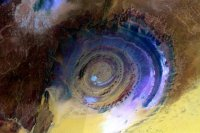

In [4]:
landsat_item

### View Landsat imagery layer item description

In [5]:
from IPython.display import HTML
HTML(landsat_item.description)

Band Num.


### Access the layers available with the Landsat Imagery Layer item
This imagery layer item contains the imagery layer that we'll be using for this tutorial. Let's save a reference to the layer in the `landsat` variable. Querying the variable will in the Jupyter notebook will quickly render it as an image

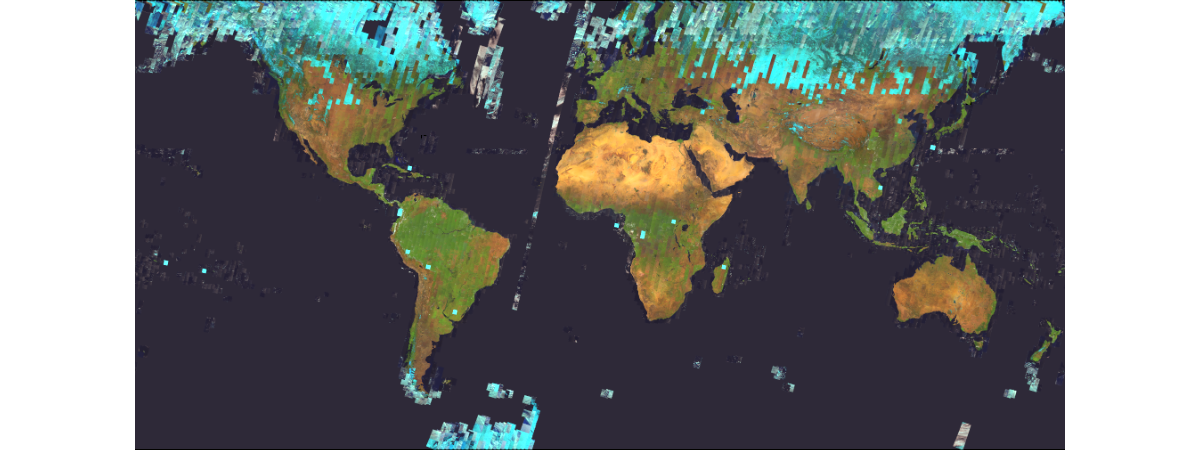

In [6]:
landsat = landsat_item.layers[0]
landsat

## Explore different wavelength bands

In [33]:
import pandas as pd

In [8]:
pd.DataFrame(landsat.key_properties()['BandProperties'])

,BandIndex,BandName,DatasetTag,WavelengthMax,WavelengthMin
0,0,CoastalAerosol,MS,450,430
1,1,Blue,MS,510,450
2,2,Green,MS,590,530
3,3,Red,MS,670,640
4,4,NearInfrared,MS,880,850
5,5,ShortWaveInfrared_1,MS,1650,1570
6,6,ShortWaveInfrared_2,MS,2290,2110
7,7,Cirrus,MS,1380,1360


## Visualize the layer in the map widget
Let's visualize the layer by creating a map widget around our area of interest and adding the Landsat Imagery layer to it:

In [9]:
m = gis.map('Redlands, CA')
m

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_01.png)

In [10]:
m.add_layer(landsat)

## Apply built-in raster functions

The multispectral imagery layer can be rendered using several different raster functions (also known as raster function templates). Each raster function template incorporates different satellite bands to highlight different land cover features. Obtain list of predefined raster function templates defined by the service backing the imagery layer:

In [11]:
for rasterfunc in landsat.properties.rasterFunctionInfos:
    print(rasterfunc.name)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
None


Let's apply the 'Color Infrared with DRA' raster function to visualize the color infrared view. This can be done using the `apply` function in the `arcgis.raster.functions` module. This function applies a server defined raster function template, given it's name, to the Imagery layer.

In [12]:
from arcgis.raster.functions import apply

In [13]:
color_infrared = apply(landsat, 'Color Infrared with DRA')

In [14]:
m = gis.map('Redlands, CA')
m.add_layer(color_infrared)
m

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_02.png)

A **true-color image** uses red, green and blue satellite bands to create an image that looks like a photograph. The **color infrared** view, on the other hand, uses the near infrared, red and green satellite bands to create an image. As a result, vegetation appears bright red in the image above.

## Interactive raster processing in Jupyter Notebook

Imagery layers can be queried in the Jupyter Notebok. This displays a raster representation of the layer as an image:

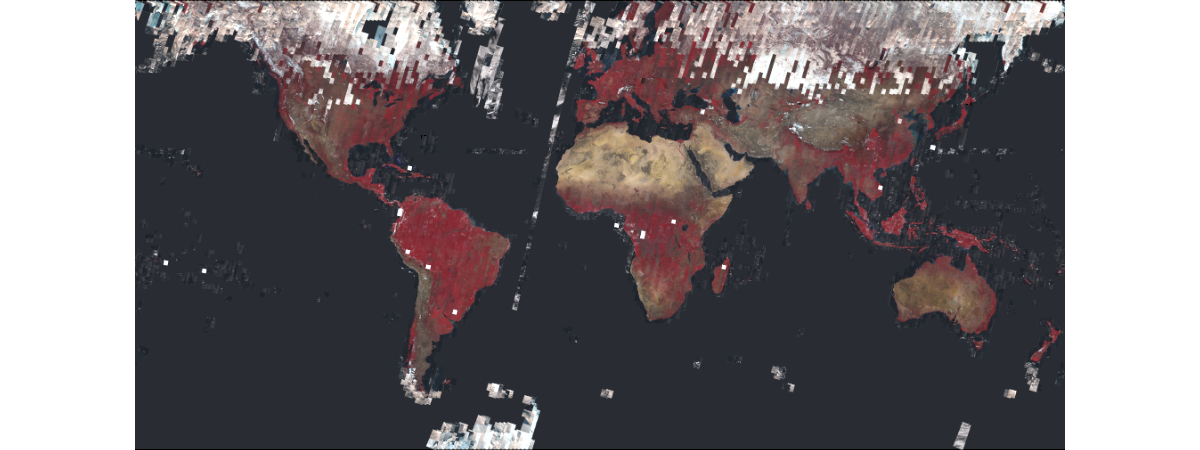

In [16]:
color_infrared

### Setting an area of interest

When working with Imagery layers, you are typically working in an area of interest. You can set the extent of the Imagery layer to that area of interest, and query it to visualize the imagery layer with that extent within the notebook:

In [7]:
from arcgis.geocoding import geocode
area = geocode('Redlands, CA', out_sr=landsat.properties.spatialReference)[0]

In [18]:
color_infrared.extent = area['extent']

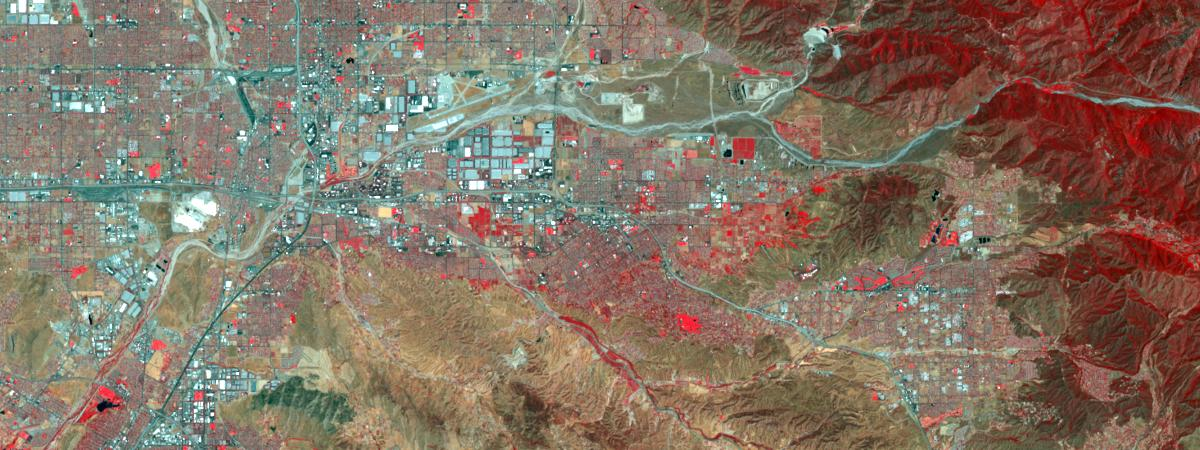

In [19]:
color_infrared

Since we will be using the landsat layer further down in this notebook, let's set it's extent to our area of extent as well:

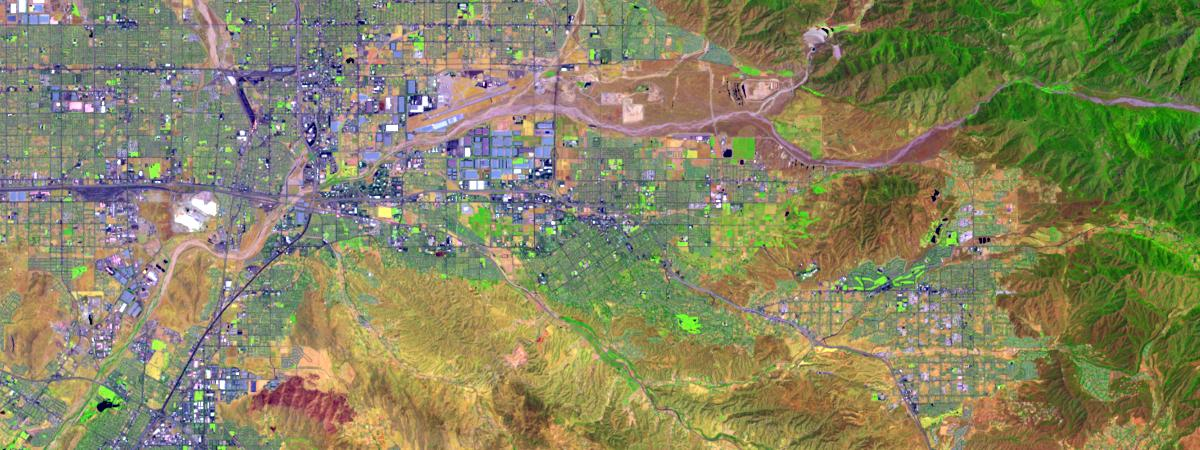

In [20]:
landsat.extent = area['extent']
landsat

## Exporting Images from Imagery Layer

In addition to visualizing the imagery layers in the Jupyter Notebook, or using a map widge, they can be exported using the `export_image` method provided by ImageryLayers:

In [50]:
from IPython.display import Image

In [22]:
img = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image')

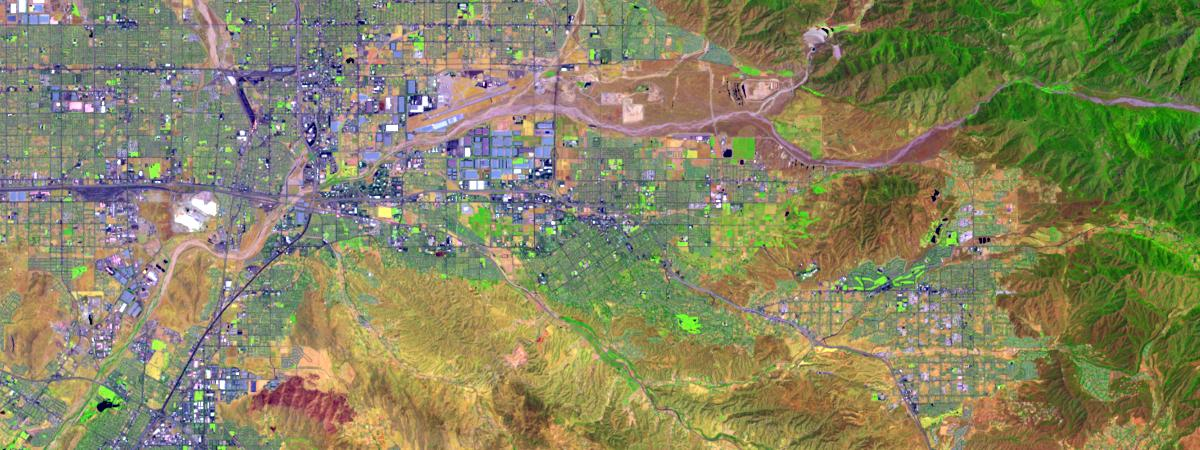

In [23]:
Image(img)

The exported image can be saved to a file by specifying a folder and file name:

In [24]:
savedimg = landsat.export_image(bbox=area['extent'], size=[1200,450], f='image', save_folder='.', save_file='img.jpg')

In [25]:
savedimg

'.\\img.jpg'

In [26]:
from IPython.display import Image

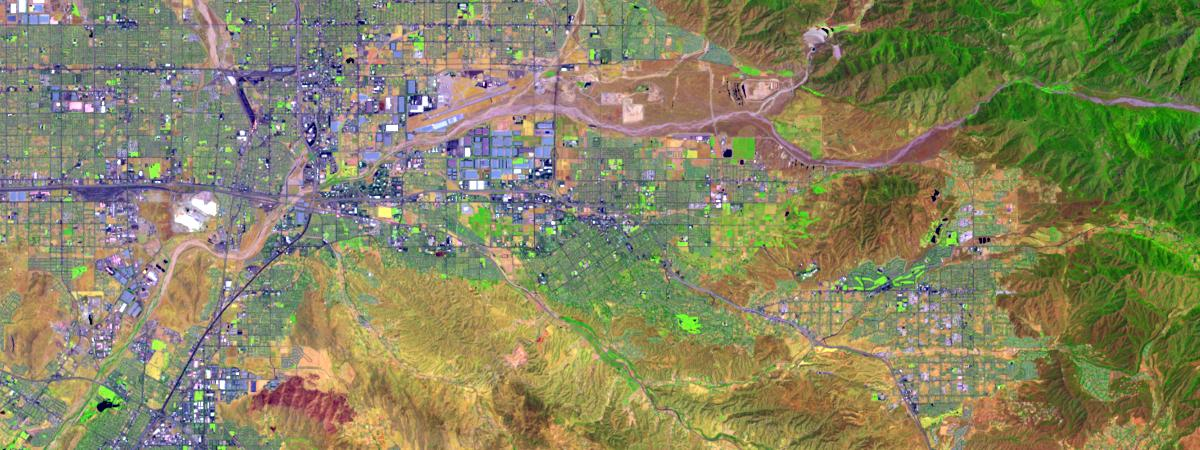

In [27]:
Image(filename=savedimg, width=1200, height=450)

### Exporting images from an imagery layer to which a raster function has been applied

The above techniques can be used to visualize imagery layers to which raster functions (or a chain of raster functions) have been applied:

In [28]:
color_infrared = apply(landsat, 'Color Infrared with DRA')

In [29]:
img = color_infrared.export_image(bbox=area['extent'], size=[1200, 450], f='image')

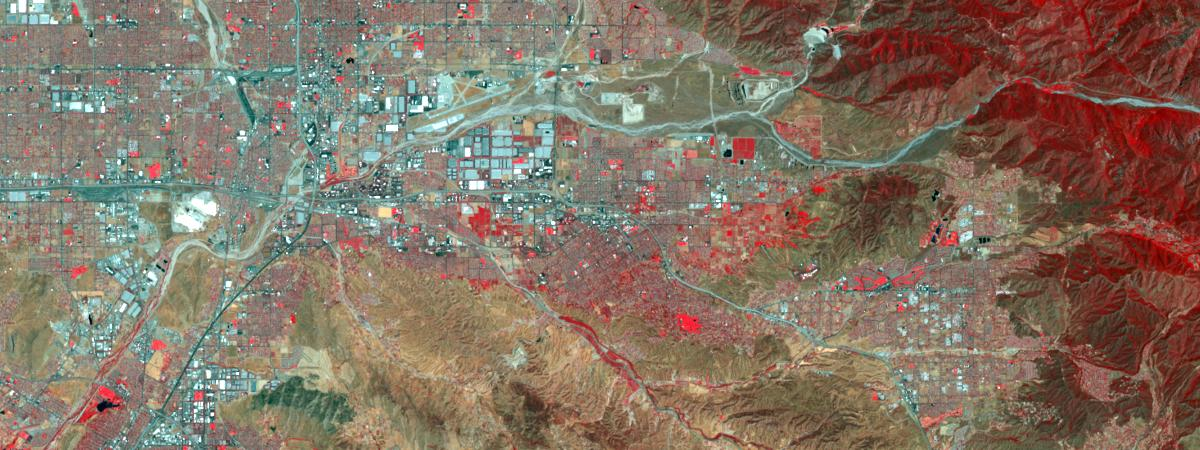

In [30]:
Image(img)

## Vegetation Index

An index combines two or more wavelengths to indicate the relative abundance of different land cover features, like vegetation or moisture.

Let's use the 'NDVI Colorized' raster function to visualize healthy, green vegetation:

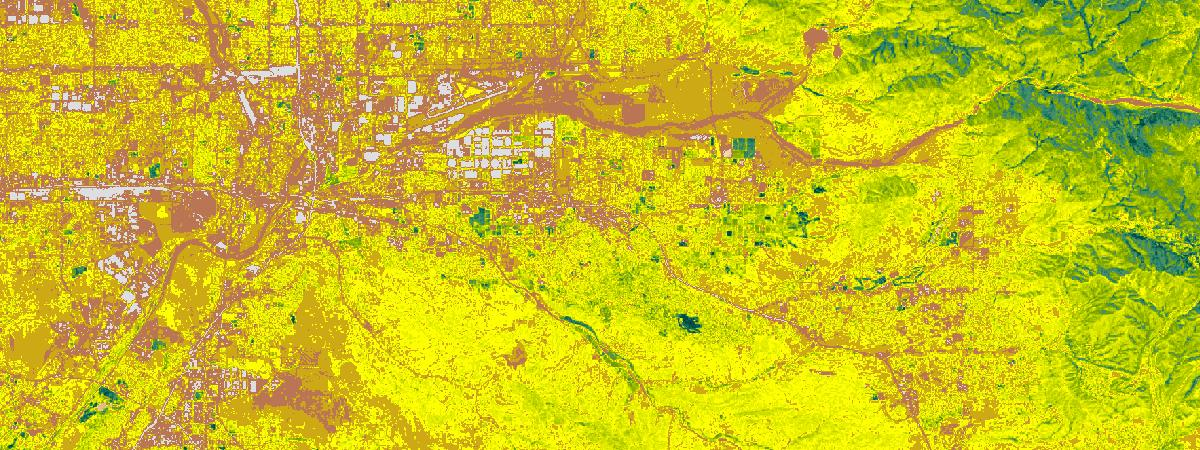

In [31]:
ndvi_colorized = apply(landsat, 'NDVI Colorized')
ndvi_colorized

NDVI is an index that indicates the presence of healthy, green vegetation (seen in green above).

## Custom Bands

You can also create your own indexes and band combinations, as well as specify stretch and gamma values to adjust the image contrast.

The code below first extracts the [3 (Red), 2 (Green), 1 (Blue)] bands using the `extract_bands` function and passes it's output to the `stretch` function to enhance the image:

In [32]:
from arcgis.raster.functions import stretch, extract_band

In [33]:
naturalcolor = stretch(extract_band(landsat, [3,2,1]), 
                    stretch_type='percentclip', min_percent=0.1, max_percent=0.1, gamma=[1, 1, 1], dra=True)

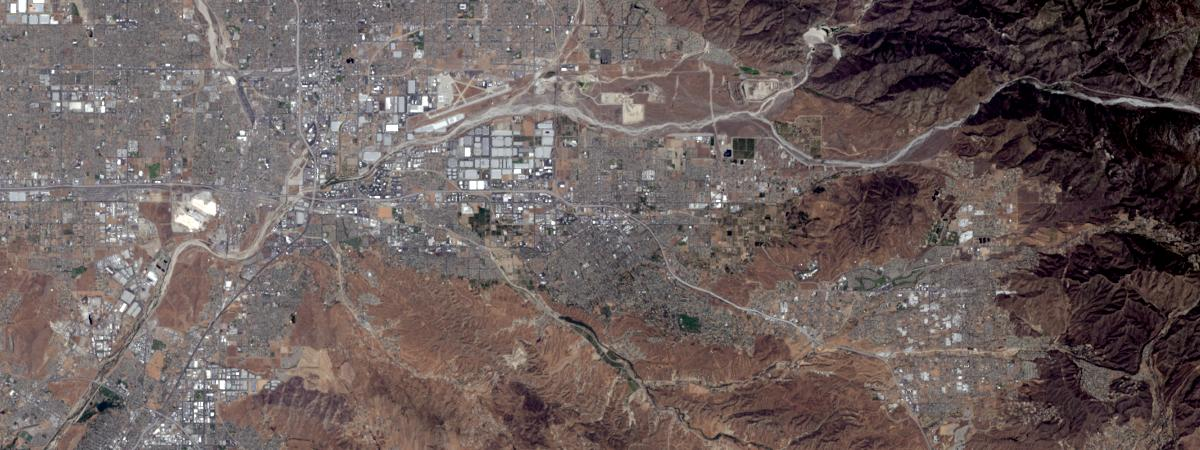

In [34]:
naturalcolor

This is a true-color image (similar to a photograph), created using the red, green, and blue satellite bands. Notice how much easier it was to find healthy vegetation using the NDVI vegetation index, compared to the true-color image here.

# Image Attributes

The `get_samples()` method returns pixel values of the source data (i.e before any rendering rules or raster functions are applied) for a given geometry as well as image attributes, like Scene ID, Acquisition Date, and Cloud Cover.

In [8]:
import arcgis
g = arcgis.geometry.Geometry(area['extent'])

In [9]:
samples = landsat.get_samples(g, sample_count=50,
                                 out_fields='AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover')

In [21]:
samples[0]

{'attributes': {'AcquisitionDate': 1497810112739,
  'Category': 1,
  'CloudCover': 0,
  'GroupName': 'LC80400362017169LGN00_MTL',
  'OBJECTID': 512686,
  'SunAzimuth': 115.0186,
  'SunElevation': 68.11962},
 'location': {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
  'x': -13051664.00092773,
  'y': 4044907.967502277},
 'locationId': 0,
 'rasterId': 512686,
 'resolution': 30,
 'value': '12709 12560 13074 14706 21385 21015 16225 5072'}

In [22]:
import datetime
value = samples[0]['attributes']['AcquisitionDate']
datetime.datetime.fromtimestamp(value /1000).strftime("Acquisition Date: %d %b, %Y")

'Acquisition Date: 18 Jun, 2017'

Here's the same information visualized as a table using Pandas:

In [23]:
pd.DataFrame(samples[0]['attributes'], index=[0])

,AcquisitionDate,Category,CloudCover,GroupName,OBJECTID,SunAzimuth,SunElevation
0,1497810112739,1,0,LC80400362017169LGN00_MTL,512686,115.0186,68.11962


## Spectral profile from the sampled values at a location

The `get_samples` method can also estimate which type of land cover most closely matches any point on the map by comparing their spectral profiles. The example below adds a 'click handler' to the map widget. When the map is clicked, a spectral profile for the clicked location is displayed using the `bokeh` charting library. 

In [15]:
m = gis.map('Redlands, CA')
m

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_03.png)

In [16]:
m.add_layer(landsat)

In [17]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
output_notebook()

def get_samples(mw, g):
    clear_output()
    m.draw(g)
    samples = landsat.get_samples(g, pixel_size=30)
    values = samples[0]['value']
    vals = [float(int(s)/100000) for s in values.split(' ')]
    
    x = ['1','2', '3', '4', '5', '6', '7', '8']
    y = vals
    p = figure(title="Spectral Profile", x_axis_label='Spectral Bands', y_axis_label='Data Values', width=600, height=300)
    p.line(x, y, legend="Selected Point", line_color="red", line_width=2)
    p.circle(x, y, line_color="red", fill_color="white", size=8)
    p.y_range=Range1d(0, 1.0)

    show(p)
    
print('Click anywhere on the map to plot the spectral profile for that location.')
m.on_click(get_samples)

Loading BokehJS ...

Click anywhere on the map to plot the spectral profile for that location.


# Clipping to an area of interest

Imagery layers can be clipped to an area of interest using the `clip` raster function. The clipping geometry can be obtained from a feature layer or spatial dataframe as well. Here's a simple example of clipping the landsat layer:

In [18]:
from arcgis.geometry import Geometry, buffer

In [19]:
poly = buffer(geometries=[Geometry(area['location'])],
              in_sr=102100, distances=6000, unit='esriMeters')[0]

In [20]:
from arcgis.raster.functions import clip

In [21]:
redclip = clip(landsat, poly)

The clipped layer can also be added to a map widget:

In [23]:
m = gis.map('Redlands, CA')

In [24]:
m

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_04.png)

In [25]:
m.add_layer(redclip)

## Select images by where clause, geometry and time range

You can select images by attributes using a where clause as well as using spatial and temporal filters, using the `filter_by` method.

The code snippet below limits the images available to those that have less than 10% cloud cover and which intersect with our area of interest:

In [36]:
selected = landsat.filter_by(where="(Category = 1) AND (CloudCover <=0.10) AND (WRS_Row = 36)", 
                   geometry=arcgis.geometry.filters.intersects(area['extent']))

You can query the filtered rasters as a FeatureSet:

In [37]:
fs = selected.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

Attributes of the selected rasters can be queried using a Pandas dataframe using the 'df' property of the FeatureSet.

In [38]:
df = fs.df
df.head()

,AcquisitionDate,Best,CloudCover,GroupName,Month,Name,OBJECTID,Shape_Area,Shape_Length,WRS_Row,SHAPE
0,233798400000,95957036,-0.01,p043r036_2x19770530,5,p043r036_2dm19770530_z11_MS,556677,5.026523e+10,897574.641900,36,"{'spatialReference': {'latestWkid': 3857, 'wki..."
1,642038400000,91960036,-0.01,p040r036_5x19900507,5,p040r036_5dt19900507_z11_MS,548722,4.694317e+10,867257.252743,36,"{'spatialReference': {'latestWkid': 3857, 'wki..."
2,956534400000,88960036,0.00,p040r036_7x20000424,4,p040r036_7dt20000424_z11_MS,539462,4.600983e+10,858608.456217,36,"{'spatialReference': {'latestWkid': 3857, 'wki..."
3,1116892800000,79960036,0.00,L7040036_03620050524,5,L72040036_03620050524_MS,530501,4.766887e+10,874086.578684,36,"{'spatialReference': {'latestWkid': 3857, 'wki..."
4,1242000000000,72960036,0.00,L5040036_03620090511,5,L5040036_03620090511_MS,518601,4.781355e+10,875674.823359,36,"{'spatialReference': {'latestWkid': 3857, 'wki..."


Looking at the shape of the dataframe we see that 46 scenes match the specified criteria:

In [31]:
df.shape

(46, 11)

The footprints of the rasters matching the criteria can be drawn using the map widget:

In [34]:
df['Time'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df['Time'].head(10)

0   1977-05-30 00:00:00.000
1   1990-05-07 00:00:00.000
2   2000-04-24 00:00:00.000
3   2005-05-24 00:00:00.000
4   2009-05-11 00:00:00.000
5   2014-04-07 18:22:17.314
6   2014-09-30 18:22:18.498
7   2014-10-16 18:22:23.338
8   2014-11-17 18:22:20.787
9   2014-12-19 18:22:16.837
Name: Time, dtype: datetime64[ns]

### Resolving overlapping pixels in selected rasters

When a setof rasters are selected by filtering an Imagery layer, they may have overlapping pixels.

The Imagery layer has methods like first(), last(), min(), max(), mean(), blend() and sum() to resolve overlap pixel values from first or last raster, use the min, max or mean of the pixel values, or blend them:

Here's the same information visualized using the map widget. This shows the selected rasters covering only our area of interest:

In [30]:
m = gis.map('Redlands, CA', 7)
display(m)
m.add_layer(selected.last())

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_05.png)

In [41]:
m = gis.map('Redlands, CA', 7)
display(m)
m.add_layer(selected.first())

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_06.png)

# Change Detection

It's quite common to compare images of the same area from two different times. The example below selects the old and new images using the `filter_by()` method ans specifying an object id. The object id can be obtained from the `query()` method described above.

In [42]:
old = landsat.filter_by('OBJECTID=1139')

In [43]:
new = landsat.filter_by('OBJECTID=463490')

## Difference Image

Difference Image mode illustrates all the changes in NDVI (vegeration index) between the two dates:

increases are shown in green, and decreases are shown in magenta. 

In [44]:
from arcgis.raster.functions import *

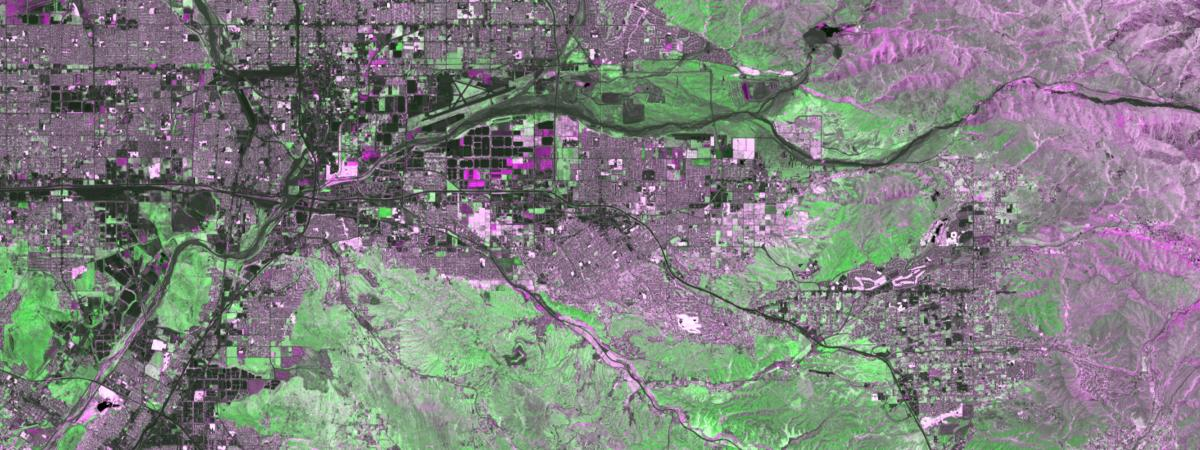

In [63]:
diff = stretch(composite_band([ndvi(old, '5 4'),
                               ndvi(new, '5 4'),
                               ndvi(old, '5 4')]), 
                               stretch_type='stddev',  num_stddev=3, min=0, max=255, dra=True, astype='u8')
diff

### Applying a threshold mask

The difference can also be computed using map algebra, as shown below:

In [46]:
ndvi_diff = ndvi(new, '5 4') - ndvi(old, '5 4')

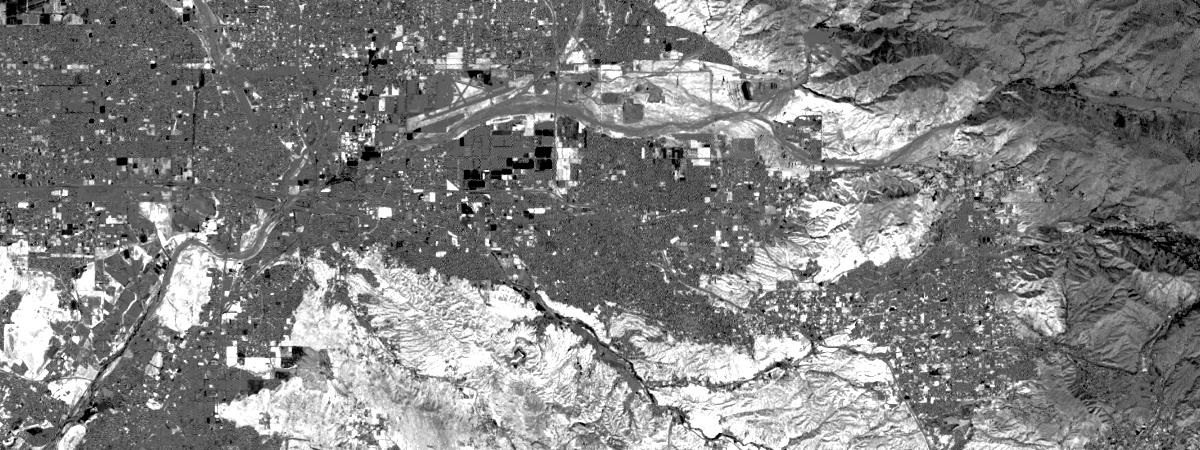

In [65]:
ndvi_diff

However, in the image above is hard to visualize in which areas the vegetation index changed by a specified threshold. The example below renders the areas where the change is above the specified threshold and renders it using a green color:

In [48]:
threshold_val = 0.1

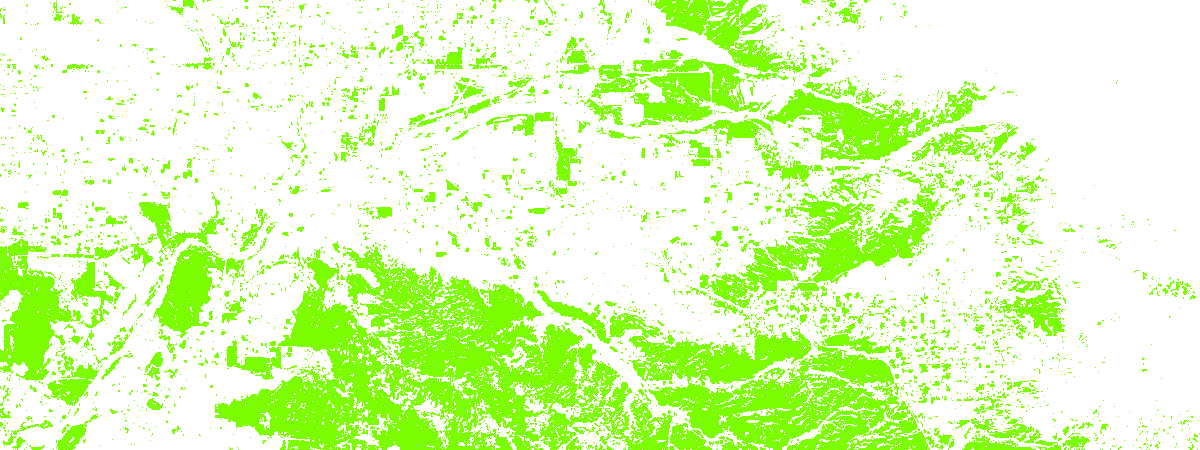

In [51]:
masked = colormap(remap(ndvi_diff, 
                        input_ranges=[threshold_val, 1], 
                        output_values=[1], 
                        no_data_ranges=[-1, threshold_val], astype='u8'), 
                  colormap=[[1, 124, 252, 0]], astype='u8')

Image(masked.export_image(bbox=area['extent'], size=[1200,450], f='image'))

The difference image and threshold mask can be visualized using the map widget:

In [52]:
m = gis.map('Redlands, CA')
m

![](http://esri.github.io/arcgis-python-api/notebooks/nbimages/guide_raster_rf_07.png)

In [53]:
m.add_layer(diff)

In [54]:
m.add_layer(masked)

### Persisting your analysis for visualizaion or analysis

The `save()` method on ImageryLayer class persists this imagery layer to the GIS as an Imagery Layer item. If `for_viz` parameter is True, a new Item is created that uses the applied raster functions for visualization at display resolution using on-the-fly image processing. If `for_viz` is False, distributed raster analysis is used for generating a new raster information product by applying raster functions at source resolution across the extent of the output imagery layer.


In the example below, the threshold mask is being saved as item for visualization:

In [71]:
lyr = masked.save('Test_viz_layer3', for_viz=True)

In [72]:
lyr

<Item title:"Test_viz_layer3" type:Imagery Layer owner:arcgis_python>